# Data Cleaning

## Introduction
In this section we will go through the data analytics process of Data Cleaning.

To skip directly to to particular parts, use the following links:
1. **[Libraries / Reading Data](#libraries_reading-data)**
2. **[Discovering Data](#discovering)**
3. **[Structuring Data](#structuring)**
4. **[Handle Missing Data](#handle_missing)**
5. **[Handle Duplicates](#handle_duplicates)**
6. **[Handle Outliers](#handle_outliers)**
7. **[Save The Cleaned Dataframe](#saving_df)**



<a id="libraries_reading-data"></a>
## 1. Libraries / Reading Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
plt.style.use('ggplot')
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../../data/raw_data.csv")

<a id="discovering"></a>
## 2. Discovering Data

In [3]:
df.head(10)

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
5,6,104000,Technology,Bill Gates,67.0,United States,Medina,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
6,7,94500,Media & Entertainment,Michael Bloomberg,81.0,United States,New York,Bloomberg LP,Media & Entertainment,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
7,8,93000,Telecom,Carlos Slim Helu & family,83.0,Mexico,Mexico City,Telecom,Telecom,Mexico,...,3.6,"$1,258,286,717,125",40.2,105.8,75.0,13.1,55.1,1.260140e+08,23.634501,-102.552784
8,9,83400,Diversified,Mukesh Ambani,65.0,India,Mumbai,Diversified,Diversified,India,...,7.7,"$2,611,000,000,000",28.1,113.0,69.4,11.2,49.7,1.366418e+09,20.593684,78.962880
9,10,80700,Technology,Steve Ballmer,67.0,United States,Hunts Point,Microsoft,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891


In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.describe()

<a id="structuring"></a>
## 3. Structuring Data

In [ ]:
# Keep column identifiers consistent
df = df.rename(
    columns={
        'finalWorth': 'final_worth_usd',
        'personName': 'person_name', 'countryOfCitizenship': 'country_of_citizenship', 'selfMade': 'wealth_source',
        'birthDate': 'birth_date',
        'lastName': 'last_name',
        'firstName': 'first_name',
        'residenceStateRegion': 'residence_state_region', 'birthYear': 'birth_year',
        'birthMonth': 'birth_month',
        'birthDay': 'birth_day',
        'gdp_country': 'gdp_country_usd',
        'gross_tertiary_education_enrollment': 'gross_tertiary_education_enrollment_country'
        , 'tax_revenue_country_country': 'tax_revenue_country_usd'
    }
)

In [ ]:
# Check datatypes for date-columns
print(type(df['birth_date'][0]))
print(type(df['date'][0]))

In [ ]:
# Convert str datatype to datetime object and validate the updated datatype
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['date'] = pd.to_datetime(df['date'])
print(type(df['birth_date'][0]))
print(type(df['date'][0]))

In [ ]:
# Dict for replacing bool values in the 'wealth_source' column for better clarity
replace_dict = {
    True: 'Self-Made',
    False: 'Inherited/Unearned'
}
df['wealth_source'] = df['wealth_source'].replace(replace_dict)

In [ ]:
# Convert 'gdp_country_in_dollars' from str to numeric after removing '$' and commas
df['gdp_country_usd'] = pd.to_numeric(
    df['gdp_country_usd'].str.strip('$ ').
    str.replace(',', '')
)

In [ ]:
# Select only relevant features for the specific data analysis project
filtered_df = df[[
    'rank', 'final_worth_usd', 'person_name', 'organization', 'title', 'residence_state_region', 'state',
    'age', 'country', 'country_of_citizenship', 'city', 'industries', 'wealth_source', 'gender',
    'life_expectancy_country', 'gross_tertiary_education_enrollment_country',
    'gross_primary_education_enrollment_country', 'gdp_country_usd', 'total_tax_rate_country', 'population_country'
]]

**Convert and Format 'final_worth_usd':** Multiply the 'final_worth_usd' column by 1,000,000 to adapt the unit and create a new column, 'final_worth_usd_formatted,' which represents the values in billions for better readability.


In [ ]:
# Before adapting the unit
print(filtered_df['final_worth_usd'][6])

In [ ]:
filtered_df['final_worth_usd'] = filtered_df['final_worth_usd'].mul(1000000)

In [ ]:
def readable_numbers(x):
    """ takes a large number and formats it into K,M,B, to make it more readable"""
    x_abs = abs(x)
    if x_abs >= 1e9:
        s = '{:1.1f}B'.format(x*1e-9)
    elif (x_abs < 1e9) & (x_abs >= 1e6):
        s = '{:1.1f}M'.format(x*1e-6)
    else:
        s = '{:1.1f}K'.format(x*1e-3)
    return s

In [ ]:
filtered_df['final_worth_usd']

In [ ]:
filtered_df['final_worth_usd_formatted'] = filtered_df['final_worth_usd'].apply(readable_numbers)

In [ ]:
filtered_df[['final_worth_usd','final_worth_usd_formatted']].sort_values(by='final_worth_usd',ascending=True)

In [ ]:
# After converting + formatting
print(filtered_df['final_worth_usd'][6])
print(filtered_df['final_worth_usd_formatted'][6])

<a id="handle_missing"></a>
## 4. Handle missing data

##### Checking for Zero Values
Before proceeding with handling missing data, it's crucial to check for zero values, as they could potentially indicate missing or undefined data.

In [ ]:
# Check for zero values in the dataframe
(df == 0).sum()

If there are numeric columns with a substantial number of zeros, it's essential to investigate whether these zeros represent genuine data or if they are indicative of missing information. In the latter case, it's advisable to replace these zeros with NaN values to ensure consistent handling of missing data in subsequent steps.
For example:
```python
df = df.replace(0, np.nan)

This step ensures a thorough examination of zero values and provides a standardized approach for addressing potential missing data. Once this is done, you can proceed with the subsequent steps of handling missing values in your dataset.

In [ ]:
# Function to get an overview of the missing data per column
def get_missing_data_rate(input_df: pd.DataFrame):
    total = input_df.isna().sum().sort_values(ascending=False)
    percent = (input_df.isna().sum() / input_df.isna().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Missing Data Total', 'Missing Data Percent'])
    return missing_data

In [ ]:
get_missing_data_rate(df)

##### Drop columns when more than 15 % of the data is missing

In [ ]:
filtered_df = filtered_df.drop(columns=['title', 'organization', 'residence_state_region', 'state'])

In [ ]:
get_missing_data_rate(filtered_df)

##### Handling Remaining Missing Data

When dealing with remaining missing data in your dataset, several options are available:

1. **Drop Rows:**
   - You can choose to drop the remaining rows with missing data. This is a straightforward approach but might result in a loss of information.

2. **Fill NaN Entries for Categorical Columns:**
   - For categorical columns, consider filling NaN entries with the mode (the most frequent value) to retain information without significant data loss.

3. **Fill NaN Entries for Numerical Columns:**
   - For numerical columns, filling NaN entries with the mean or median of the specific column is an option. Use the mean if the data is not skewed and does not contain outliers. If skewness or outliers are present, the median is a more robust fill option.

4. **Consideration for Outliers:**
   - It's important to be mindful of outliers in the data. If your dataset contains skewed data or outliers, favor using the median as the NaN-fill option to avoid the influence of extreme values.

5. **Avoid Biased Data:**
   - To ensure the integrity of your analysis and avoid biased results, consider dropping the remaining rows with missing data. This helps maintain the overall quality and fairness of your dataset.

Choose the appropriate strategy based on the nature and characteristics of your data, taking into account the potential impact on the analysis and results.


In [ ]:
# Check rows with missing data
filtered_df[filtered_df.isna().any(axis=1)]

In [ ]:
filtered_df.isna().sum().max()

In [ ]:
# Drop remaining NaN-Enry rows
filtered_df = filtered_df.dropna(axis=0)

In [ ]:
# Validate that there's no missing data left
filtered_df.isna().sum().max()

<a id="handle_duplicates"></a>
## 5. Handle Duplicates

Duplicate entries in a dataset can introduce inconsistencies and skew analysis results.
You begin by identifying and detecting duplicate rows in your dataset. 

In [ ]:
# Check for exact duplicated rows in the df
filtered_df.loc[filtered_df.duplicated()]

In [ ]:
# Check for feature-specific duplicated rows based on 'person_name' and 'country'
filtered_df.loc[filtered_df.duplicated(subset=['person_name', 'country'])]

In [ ]:
# Investigate feature-specific duplicates for 'person_name'
filtered_df.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

After identifying duplicate rows, the next steps involve deciding whether to drop or maintain them, considering the potential consequences of data loss. In this case, it's observed that for 'Wang Yanqing & family' and 'Li Li,' there are entries with slight differences in gender and age, suggesting they might not belong to the same person.

To demonstrate how to drop potentially feature-specific duplicated rows, the following code can be used:

In [ ]:
# Drop potentially feature-specific duplicated rows
filtered_df_no_duplicates = filtered_df.loc[~filtered_df.duplicated(subset=['person_name', 'country'])] \
    .reset_index(drop=True).copy()

In [ ]:
# Verify that dropping potentially duplicated rows worked properly
filtered_df_no_duplicates.query('person_name == "Li Li" or person_name.str.startswith("Wang Yanqing")')

<a id="handle_outliers"></a>
## 6. Handle outliers

#### Handling Outliers in Final Worth Distribution

Outliers, or extreme values, in the final worth distribution of billionaire data can introduce biases and distort the overall analysis. It is essential to address these outliers to ensure the analysis accurately reflects the underlying patterns in the data. One widely employed method is the Interquartile Range (IQR) approach, involving the following steps:

***Calculate Percentiles:***
Compute the 25th (Q1) and 75th (Q3) percentiles of the final worth values in the dataset.

***Calculate IQR:***
Determine the Interquartile Range (IQR) by subtracting Q1 from Q3.

***Define Upper and Lower Thresholds:***
Establish upper and lower thresholds for identifying outliers, typically considering values outside 1.5 times the IQR as potential outliers.

***Filter Outliers Using Boolean Masks:***
Use boolean masks to filter the dataframe, retaining only rows where the final worth is within the defined upper and lower limits.

***Analyze Results:***
Examine the impact of outlier handling on central tendency measures, such as mean and median, to understand the distribution's revised characteristics.

In [160]:
print(f"Final Worth Mean before handling outliers: {readable_numbers(filtered_df['final_worth_usd'].mean())}")
print(f"Final Worth Median before handling outliers: {readable_numbers(filtered_df['final_worth_usd'].median())}")

Final Worth Mean before handling outliers: 4.6B
Final Worth Median before handling outliers: 2.3B


In [161]:
# Define a function for boxplot creation for better reusability
def create_box_plot(df, title, show_fliers):
    plt.figure(figsize=(14, 6))
    boxplot = sns.boxplot(data=df, x='final_worth_usd', y='industries', showfliers=show_fliers)
    boxplot.set(xlabel='Final Worth ($)', ylabel='Industry')
    # Format the x-axis tick labels
    boxplot.set_xticklabels([readable_numbers(x) for x in boxplot.get_xticks()])
    plt.title(label=title, fontsize=18, fontweight='bold')
    plt.show()

In [162]:
title_outliers = "Final Worth Distribution by Industry - Outliers included"
title_no_outliers = "Final Worth Distribution by Industry - Outliers excluded"

Usually you can check for outliers through a boxplot related to the specific numerical (x) and a dependent categorical (y) feature;
But this type of dataset is very susceptible to outliers because of the wide range of billionaires' wealth 

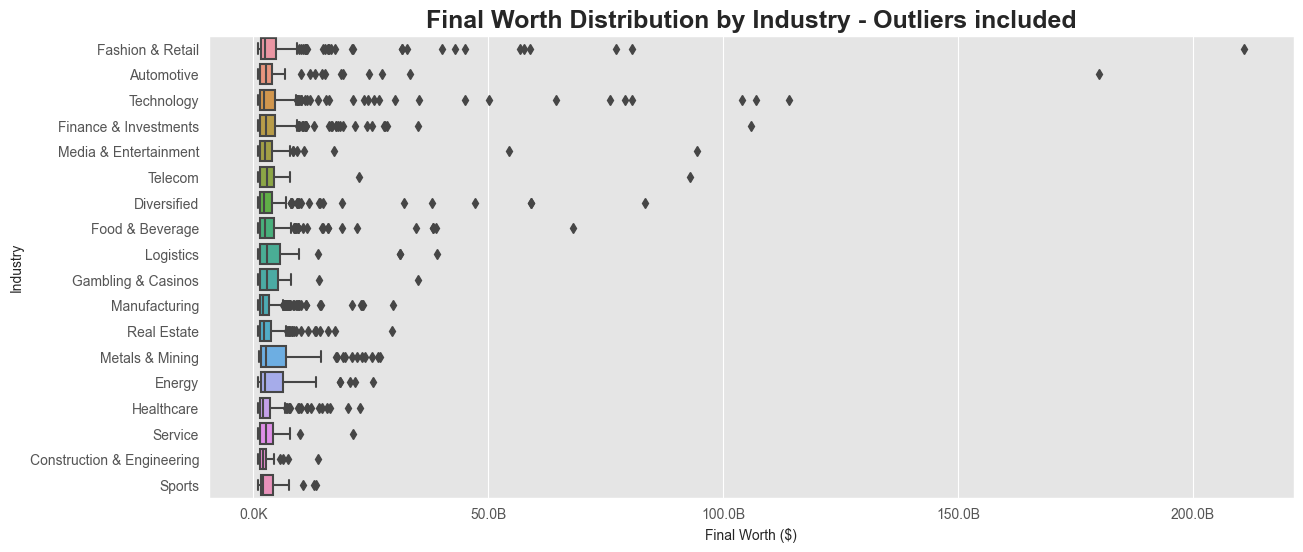

In [163]:
# Outliers included
create_box_plot(filtered_df, title_outliers, show_fliers=True)

##### To get a better view of the final worth distribution we exclude the outliers

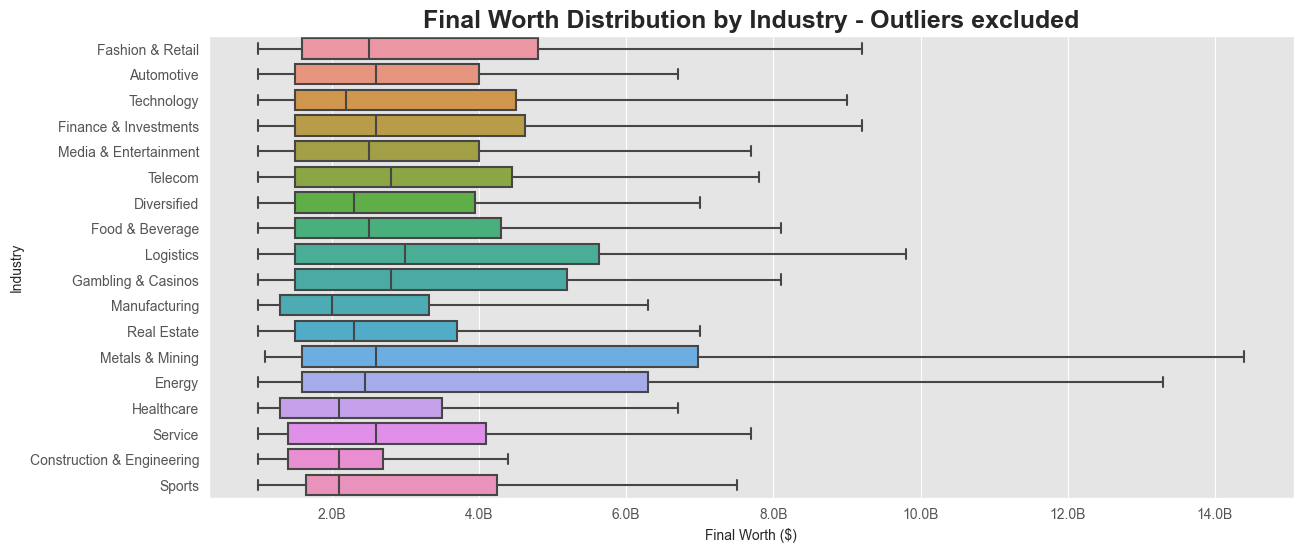

In [164]:
create_box_plot(filtered_df, title_no_outliers, show_fliers=False)

##### Here starts the IQR approach

In [165]:
# Calculate 25th percentile of annual strikes
percentile25 = filtered_df['final_worth_usd'].quantile(0.25)

# Calculate 75th percentile of annual strikes
percentile75 = filtered_df['final_worth_usd'].quantile(0.75)

# Calculate interquartile range
iqr = percentile75 - percentile25

# Calculate upper and lower thresholds for outliers
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print('Upper limit is: ', readable_numbers(upper_limit))
print('Lower limit is: ', readable_numbers(lower_limit))

Upper limit is:  8.2B
Lower limit is:  -2.6B


##### Boolean masks were used to filter the dataframe so it only contained rows where the number of strikes was less than the lower limit / more than the upper limit

In [166]:
print(len(filtered_df[filtered_df['final_worth_usd'] < lower_limit]))
print(len(filtered_df[filtered_df['final_worth_usd'] > upper_limit]))

0
248


In [167]:
mask = (filtered_df['final_worth_usd'] >= lower_limit) & (filtered_df['final_worth_usd'] <=
upper_limit)

outliers_handled = filtered_df[mask].copy()
print(f"Final Worth Mean after handling outliers: {readable_numbers(outliers_handled['final_worth_usd'].mean())}")
print(f"Final Worth Median after handling outliers: {readable_numbers(outliers_handled['final_worth_usd'].median())}")

Final Worth Mean after handling outliers: 2.7B
Final Worth Median after handling outliers: 2.1B


As shown, the data is now less widely dispersed and there are way less outliers than before

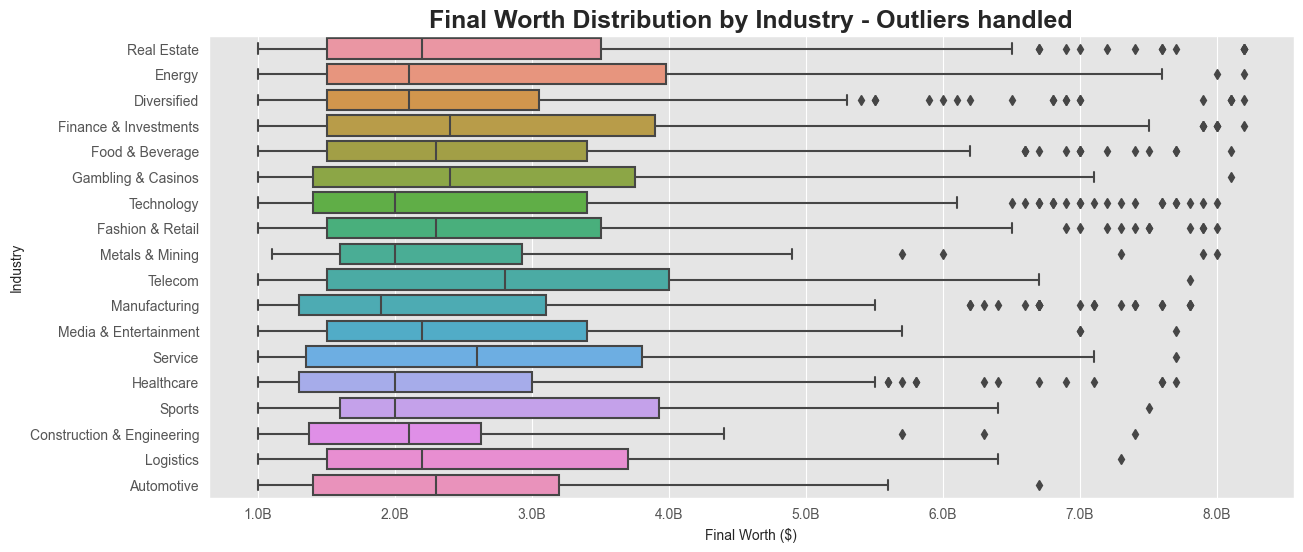

In [168]:
title_outliers_handled = "Final Worth Distribution by Industry - Outliers handled"
create_box_plot(outliers_handled, title_outliers_handled, show_fliers=True)

<a id="saving_df"></a>
## 7. Save The Cleaned Dataframe

#### Not to be forgotten
While handling outliers using the IQR method is a common practice in exploratory data analysis (EDA), it is important to be aware of its potential drawbacks. Removing outliers can lead to data loss and bias, which will affect the overall representativeness of the analysis. The decision on how to deal with outliers (delete, reassign or leave) should be made carefully, taking into account the specific characteristics of the dataset and the intended use, especially in the context of EDA without subsequent development of predictive machine learning models. Whether outliers are retained, reassigned or removed depends on the type and size of the dataset and the objectives of the analysis. It is crucial to balance the benefits of outlier correction with the potential drawbacks to ensure a thoughtful and context-aware approach.

For future EDA, you should use the original filtered df (without outlier handling), because outliers aren't systematic data errors here that could influence our analysis in a bad way; they are a valuable part of the overall df.

In [169]:
filtered_df.to_csv("../../data/cleaned_data.csv", index=False)

In [170]:
outliers_handled.to_csv("../../data/cleaned_data_outliers_handled.csv", index=False)